로지스틱 회귀-유방암
==
- 로지스틱회귀의 개념
- 합격 불합격 확률
- BreastCancer.csv

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [3]:
p, f = len(pass_time), len(fail_time)
p, f

(18, 16)

In [0]:
pass_time_g = [1.5, 2, 2.1,2.6,2.1,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4, 1.3, 1.2]
fail_time_g = [16, 17, 16, 17,10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 18.1]

In [5]:
len(pass_time_g), len(fail_time_g)


(18, 16)

In [6]:
X1 = np.hstack((pass_time,fail_time))
X1

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 16. , 16. , 16.5,
       17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,  5.2,
        5.4])

In [7]:
X2 = np.hstack((pass_time_g,fail_time_g))
X2

array([ 1.5,  2. ,  2.1,  2.6,  2.1,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,
        3.6,  3. ,  5. ,  5.2,  5.4,  1.3,  1.2, 16. , 17. , 16. , 17. ,
       10. , 12. , 14. , 14.5, 15. , 16. , 16. , 16.5, 17. , 17. , 17. ,
       18.1])

In [0]:
X = pd.DataFrame(list(zip(X1, X2)))

In [9]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

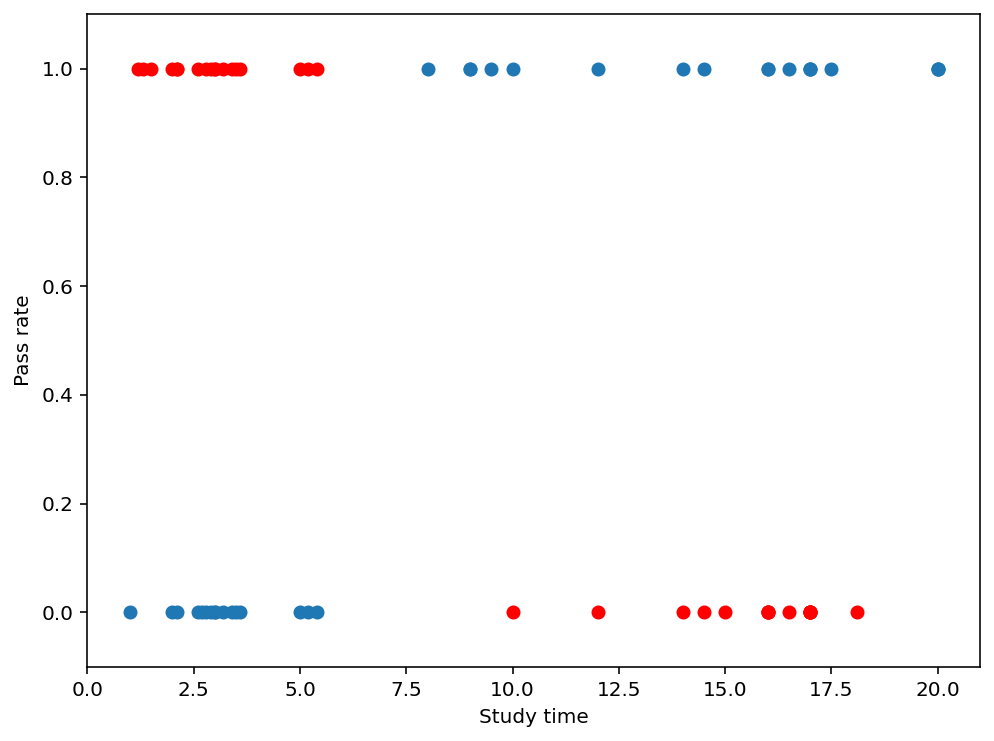

In [10]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X[0], y)
plt.scatter(X[1], y, c='r')

plt.show()

In [13]:
model = LogisticRegression()
model.fit(X,y)

print(model.coef_)      # a
print(model.intercept_) # b

[[ 0.47269426 -0.61587179]]
[1.57048764]


In [14]:
model.predict([[1.2,5.5],[8.8,1.9]])

array([0, 1])

In [15]:
model.predict_proba([[1.2,5.5],[8.8,1.9]])

array([[0.77722613, 0.22277387],
       [0.01035332, 0.98964668]])

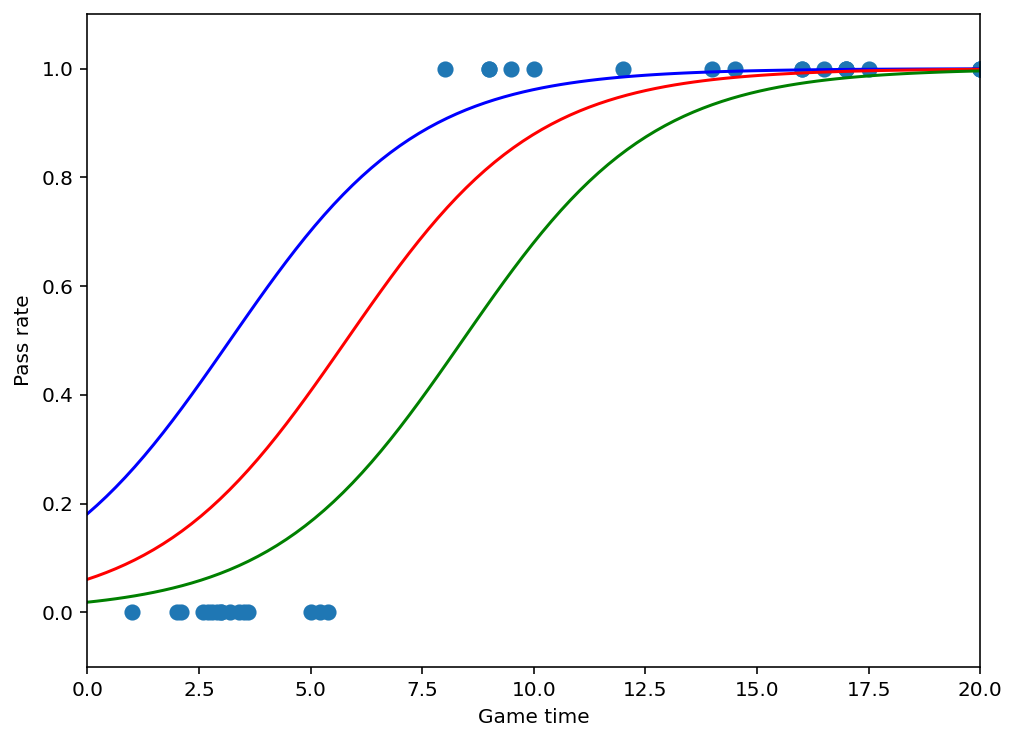

In [17]:
def logreg(z):
    return 1 /(1+np.exp(-z))

a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X[0], y, s=50)
XX = np.linspace(0,21, 100)
yy = logreg(a1*XX +a2*5+ b) # game 5시간
plt.plot(XX, yy, c='b')
yy = logreg(a1*XX +a2*7+ b) # game 7시간
plt.plot(XX, yy, c='r')
yy = logreg(a1*XX +a2*9+ b) # game 9시간
plt.plot(XX, yy, c='g')
plt.show()

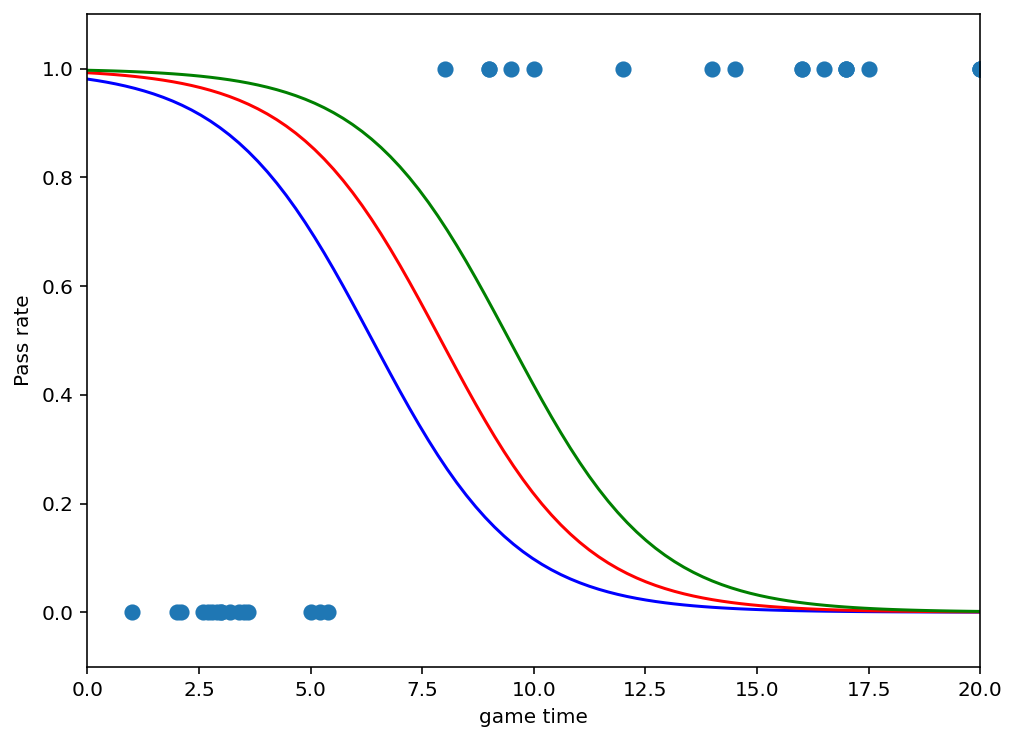

In [19]:
def logreg(z):
    return 1 /(1+np.exp(-z))

a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('game time')
plt.ylabel('Pass rate')
plt.scatter(X[0], y, s=50)
XX = np.linspace(0,21, 100)
yy = logreg(a1*5 +a2*XX+ b)
plt.plot(XX, yy, c='b')
yy = logreg(a1*7 +a2*XX+ b)
plt.plot(XX, yy, c='r')
yy = logreg(a1*9 +a2*XX+ b)
plt.plot(XX, yy, c='g')
plt.show()

## 시그모이드 함수의 특성

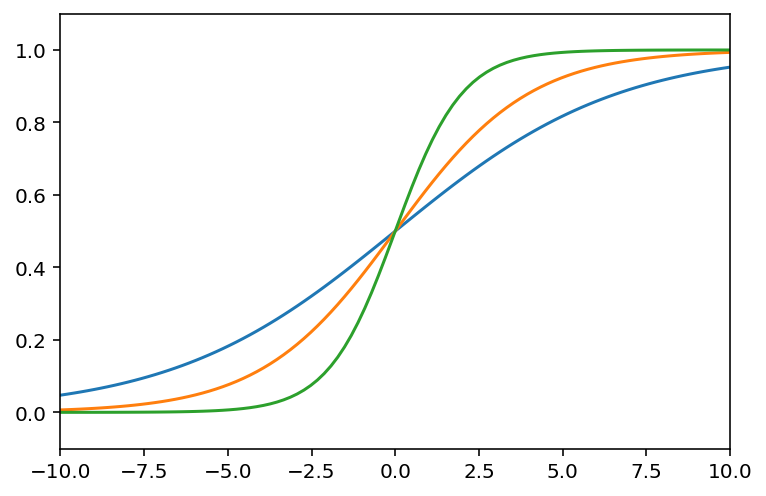

In [20]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.3, 0.5, 1]
b = 0
xs = np.linspace(-10, 10, 100)
for a in a_list:
  ys = logreg(a*xs + b)
  plt.plot(xs, ys)

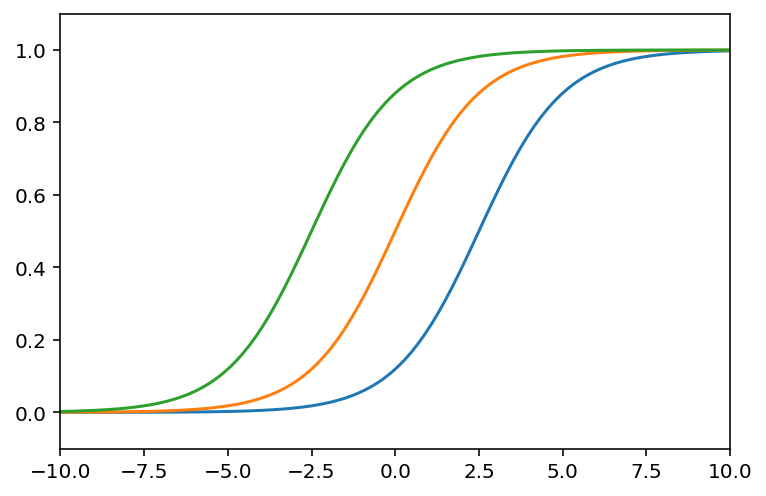

In [21]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a = 0.8
b_list = [-2, 0, 2]
xs = np.linspace(-10, 10, 100)
for b in b_list: 
    ys = logreg(a*xs + b)
    plt.plot(xs, ys)

## 유방암 진단

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [24]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [25]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
features = ["mean radius"]
X = df[features]
y = cancer.target
np.random.seed(11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 85.38%


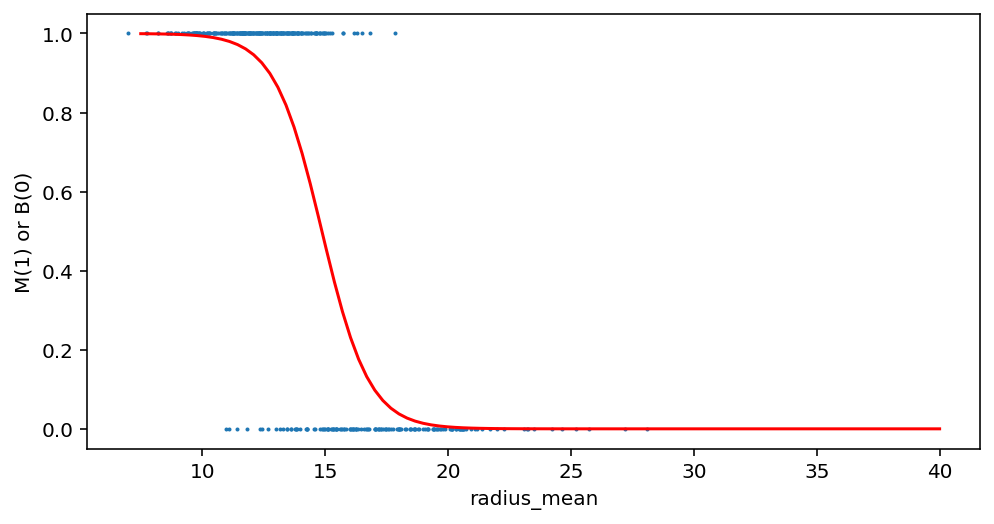

In [27]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logreg(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [0]:
features = ["mean texture"]
X = df[features]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model=LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.695906432748538

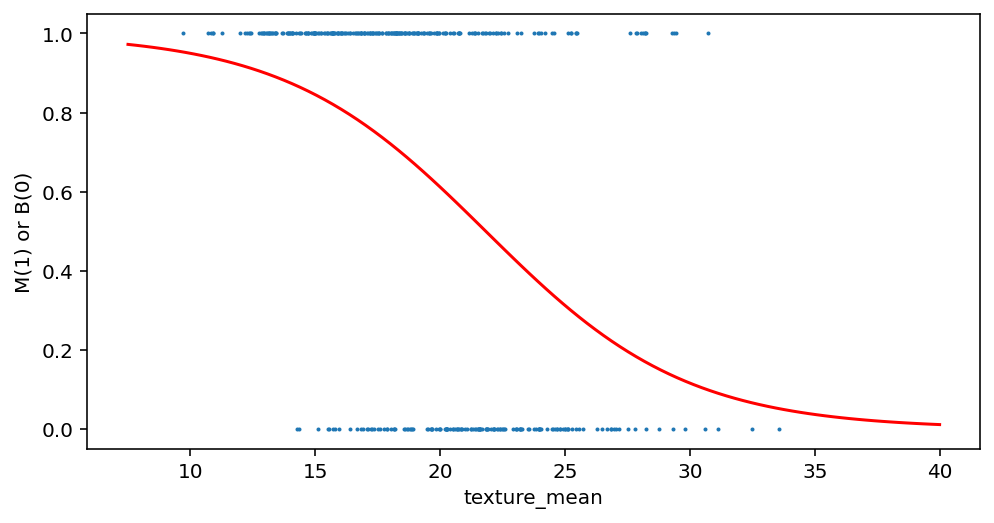

In [30]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [31]:
features = ["mean radius", "mean texture"]
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 89.47%


## 모든 속성을 사용

In [32]:
X = cancer.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 97.08%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## (참고) 다른 알고리즘과 비교

In [33]:
# 모든 속성을 다 사용한 경우의 kNN의 성능
from sklearn.neighbors import KNeighborsClassifier  
for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

K =  1 -> Score: 94.74%
K =  3 -> Score: 95.32%
K =  5 -> Score: 94.74%
K =  7 -> Score: 95.91%
K =  9 -> Score: 95.32%
K =  11 -> Score: 95.91%
K =  13 -> Score: 95.91%
K =  15 -> Score: 95.91%
K =  17 -> Score: 95.91%
K =  19 -> Score: 95.91%


In [34]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

결정트리 -> 96.49%


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

랜덤포레스트 : 95.91%


## 소프트맥스
- 다항 로지스틱스

In [36]:
score = [-1, -0.5, 1.0, 1.5]

prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.045 0.074 0.333 0.548]
